# Dynamic Programming

## Contents

- <a href="#Introduction"> Introduction </a>
- <a href="#Policy-Evaluation"> Policy Evaluation </a>
- <a href="#Policy-Improvement"> Policy Improvement </a>
- <a href="#Policy-Iteration"> Policy Iteration </a>
- <a href="#Value-Iteration"> Value Iteration </a>
- <a href="#Coding-Exercises"> Coding Exercises </a>

<br><br>

## Introduction

**`The term dynamic programming (DP) refers to a collection of algorithms that can be used to compute optimal policies given a perfect model of the environment as a Markov decision process (MDP).`**
                                                                            - Sutton & Barto 2018


<br><br>

## Policy Evaluation

#### Policy Evaluation Equation

<img src='./image/Iterative_Policy Evaluation_Equations._Sutton&Barto.jpg'>

#### Pshotdocode for Policy Evaluation

<img src='./image/Iterative_Policy Evaluation_Pshotdocode_Sutton&Barto.jpg'>

**Input:**

- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: A 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: The discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: A very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

**Output:**
- `V`: A 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s` under the input policy.

<br><br>

## Policy Improvement

#### Action Values Equation
<img src='./image/Action_Values_Equations_Sutton&Barto.jpg'>


#### Policy Improvement Equation

<img src='./image/Policy_Improvement_Equations_Sutton&Barto.jpg'>

**Input:**

- `env`: An instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: A 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `gamma`: The discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

**Output:**
- `policy`: A 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.

<br><br>

## Policy Iteration

#### Pshotdocode for Policy Iteration

<img src='./image/Policy_IterationPshotdocode_Sutton&Barto.jpg'>

**Input:**

- `env`: An instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: The discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: A very small positive number that is used to decide if the policy evaluation step has sufficiently converged to the true value function (default value: `1e-8`).

**Output:**
- `policy`: A 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: A 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

<br><br>

## Value Iteration

#### Pshotdocode for Value Iteration

<img src='./image/Value_IterationPshotdocode_Sutton&Barto.jpg'>

**Input:**

- `env`: An instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: The discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: A very small positive number that is used for the stopping criterion (default value: `1e-8`).

**Output:**
- `policy`: A 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: A 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

<br><br><br><br>

## Coding Exercises

In this section, we'll go through the coding for Dynamic Programming coding exercises with Python and OpenAI gym environment.

We'll be using the OpenAI gym <a href='https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py'>frozen_lake</a> environment for this notebook.

In [1]:
# Importing the necessary packages 
import copy
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text import frozen_lake

In [2]:
# Let's create the OpenAI Gym 'frozen_lake' environment
env = frozen_lake.FrozenLakeEnv()

In [3]:
# Basic information about the environment
print('Instance:', env)
print('Observation Space:',env.observation_space.n)
print('Action Space:',env.action_space.n)

Instance: <FrozenLakeEnv instance>
Observation Space: 16
Action Space: 4


In [4]:
# The master class
class Dynamic_Programming(object):
    def __init__(self):
        super(Dynamic_Programming, self).__init__()
        pass
    
    def policy_evaluation(self, env, policy, gamma=1, theta=1e-8):
        V = np.zeros(env.nS)
        while True:
            delta = 0
            for s in range(env.nS):
                Vs = 0
                for a, action_prob in enumerate(policy[s]):
                    for prob, next_state, reward, done in env.P[s][a]:
                        Vs += action_prob * prob * (reward + gamma * V[next_state])
                delta = max(delta, np.abs(V[s]-Vs))
                V[s] = Vs
            if delta < theta:
                break
        return V
    
    def action_value(self, env, V, s, gamma=1):
        q = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[s][a]:
                q[a] += prob * (reward + gamma * V[next_state])
        return q

    def policy_improvement(self, env, V, gamma=1):
        policy = np.zeros([env.nS, env.nA]) / env.nA
        for s in range(env.nS):
            q = self.action_value(env, V, s, gamma)
            best_a = np.argwhere(q==np.max(q)).flatten()
            policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)
        return policy
    
    def policy_iteration(self, env, gamma=1, theta=1e-8):
        policy = np.ones([env.nS, env.nA]) / env.nA
        while True:
            V = self.policy_evaluation(env, policy, gamma, theta)
            new_policy = self.policy_improvement(env, V)

            if (new_policy == policy).all():
                break;
                
            policy = copy.copy(new_policy)
        return policy, V
    
    def value_iteration(self, env, gamma=1, theta=1e-8):
        V = np.zeros(env.nS)
        while True:
            delta = 0
            for s in range(env.nS):
                v = V[s]
                V[s] = max(self.action_value(env, V, s, gamma))
                delta = max(delta,abs(V[s]-v))
            if delta < theta:
                break
        policy = self.policy_improvement(env, V, gamma)
        return policy, V
    
    def visualization(self, V):
        V_sq = np.reshape(V, (4,4))

        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)
        im = ax.imshow(V_sq, cmap='cool')
        for (j,i),label in np.ndenumerate(V_sq):
            ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
        plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        plt.show()


In [5]:
# Instance of Dynamic_Programming class
dp = Dynamic_Programming()

### Run Policy Evaluation

Values

 [0.01393977 0.01163091 0.02095297 0.01047648 0.01624865 0.
 0.04075153 0.         0.03480619 0.08816993 0.14205316 0.
 0.         0.17582037 0.43929118 0.        ]


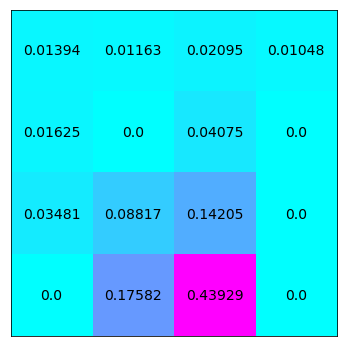

In [6]:
policy = np.ones([env.nS, env.nA]) / env.nA
values = dp.policy_evaluation(env, policy)
print("Values\n\n", values)
dp.visualization(values)

### Run Policy Improvement 

In [7]:
improved_policy = dp.policy_improvement(env, values)
print(improved_policy)

[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]


### Run Policy Iteration


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



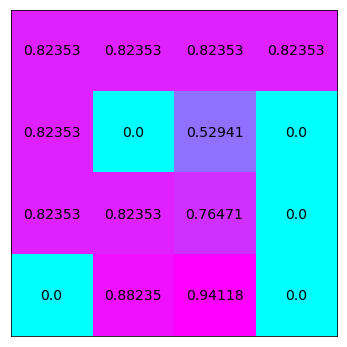

In [8]:
policy_pi, V_pi = dp.policy_iteration(env)

print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

dp.visualization(V_pi)

### Run Value Iteration 


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



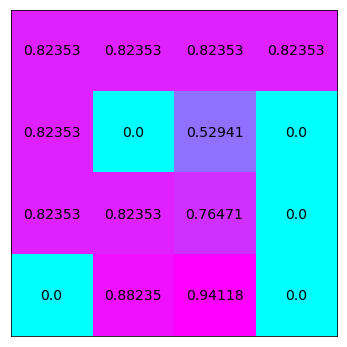

In [9]:
policy_vi, V_vi = dp.value_iteration(env)

print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

dp.visualization(V_vi)

**`Image Cradit: Reinforcement Learning: An Introduction(2018) by Richard S. Sutton and Andrew G. Barto `**